# Intro - April 5, 2021

In [1]:
from astropy.utils.data import get_pkg_data_filename
from astropy.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from astropy.io import fits
import pandas as pd
import astroquery
from astroquery.mast import Observations
import lightkurve as lk
from astropy.table import Table

## Notes

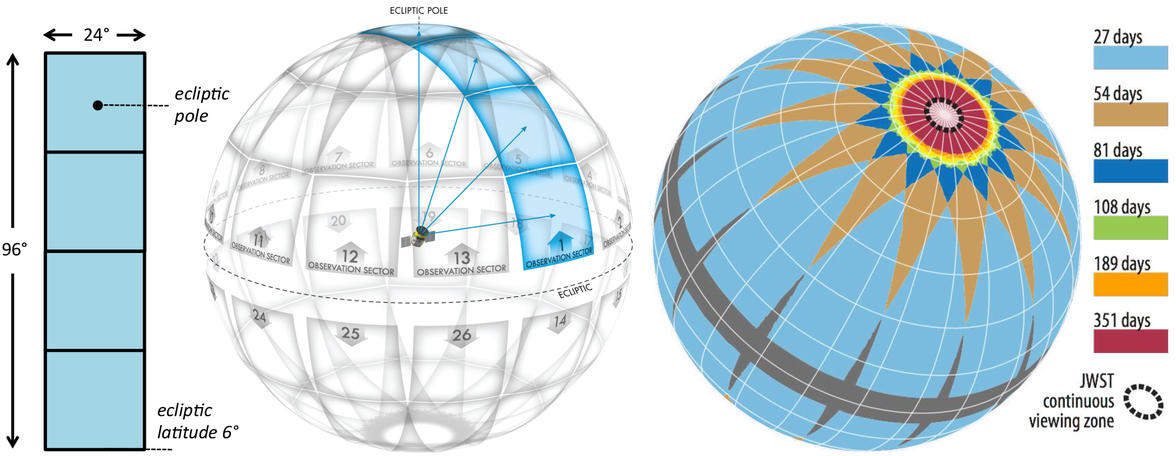

In [2]:
Image(filename='/Users/romfradkin/Desktop/Astrophysics/Images/tessSectors.jpg') 

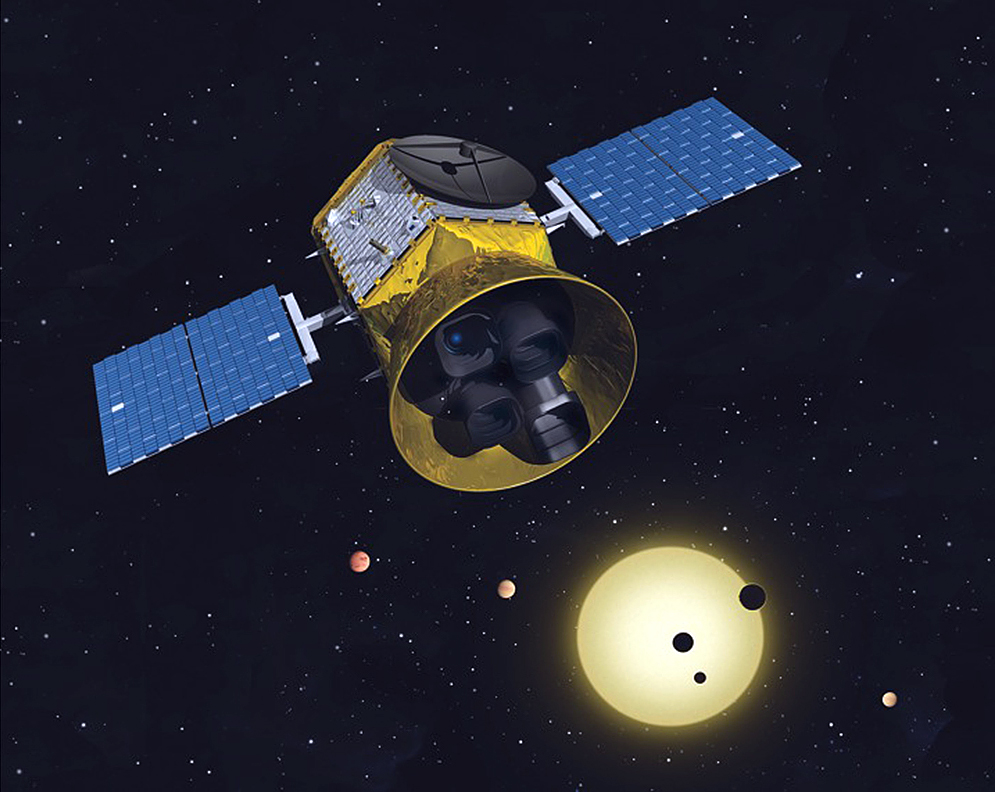

In [3]:
Image(filename='/Users/romfradkin/Desktop/Astrophysics/Images/tessSpacecraft.jpg') 

## Astropy

In [4]:
fits_file = get_pkg_data_filename('/Users/romfradkin/Desktop/Astrophysics/Sector1LC.nosync/tess2018206045859-s0001-0000000025155310-0120-s_lc.fits')  

In [5]:
fits.info(fits_file)

Filename: /Users/romfradkin/Desktop/Astrophysics/Sector1LC.nosync/tess2018206045859-s0001-0000000025155310-0120-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   20076R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


In [6]:
fits.getdata(fits_file, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

In [7]:
fitsData = Table(fits.getdata(fits_file, ext=1))
fitsData

TIME,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,QUALITY,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2
float64,float32,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1325.2952597688304,0.00089758344,70444,7976.1187,10.396467,763.7437,2.3431501,nan,nan,8,nan,nan,nan,nan,1623.9065200461275,0.0008006286,393.4014360522928,0.00094395614,nan,nan
1325.2966486684504,0.00089759467,70445,8025.5674,10.421468,762.1245,2.3448346,9233.582,12.31405,0,nan,nan,nan,nan,1623.85162968588,0.00080720574,393.35080871477953,0.0009408092,0.028770527,-0.07397169
1325.2980375681282,0.00089760596,70446,8049.3604,10.4335165,761.4083,2.345166,9244.356,12.328287,0,nan,nan,nan,nan,1623.8257646541292,0.0008095662,393.32254674477457,0.0009370876,-0.002408614,-0.10912614
1325.2994264677468,0.0008976172,70447,8063.4863,10.443287,762.46497,2.3458278,9261.54,12.339831,0,nan,nan,nan,nan,1623.8258020439248,0.0008089692,393.3191996123696,0.00093583745,-0.0030620014,-0.11284415
1325.3008153673668,0.00089762843,70448,8035.2324,10.428933,764.35455,2.3488533,9228.784,12.322871,0,nan,nan,nan,nan,1623.8239237041385,0.00081079575,393.3107402331461,0.0009388011,-0.0049278643,-0.123616934
1325.3022042670445,0.0008976397,70449,8050.2725,10.437266,768.21545,2.3512347,9241.798,12.332719,0,nan,nan,nan,nan,1623.816231432203,0.00081186224,393.3094802417095,0.0009367432,-0.011961141,-0.12371579
1325.3035931667214,0.000897651,70450,8041.731,10.435251,769.87195,2.3515704,9232.813,12.330336,0,nan,nan,nan,nan,1623.8174214702271,0.0008131762,393.3095779312513,0.00093659555,-0.013031098,-0.12403972
1325.3049820663414,0.00089766225,70451,8039.628,10.434906,771.3647,2.3547435,9232.669,12.329928,0,nan,nan,nan,nan,1623.8195029667104,0.00081195607,393.3062595639136,0.00093836966,-0.008872178,-0.12792237
1325.3063709660191,0.00089767354,70452,8044.776,10.437505,769.8819,2.352568,9237.258,12.333,0,nan,nan,nan,nan,1623.8203809117567,0.0008119247,393.31121028741507,0.00093837525,-0.010403624,-0.124001406


In [8]:
with fits.open(fits_file, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

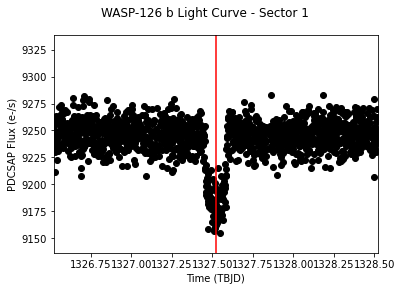

In [9]:
# Define the epoch of primary transit in TBJD.  Our timestamps are also already in TBJD.
t0 = 1327.520678

# Start figure and axis.
fig, ax = plt.subplots()

# Plot the timeseries in black circles.
ax.plot(tess_bjds, pdcsap_fluxes, 'ko')

# Center the x-axis on where we expect a transit to be (time = T0), and set
# the x-axis range within +/- 1 day of T0.
ax.set_xlim(t0 - 1.0, t0 + 1.0)

# Overplot a red vertical line that should be where the transit occurs.
ax.axvline(x=t0, color="red")

# Let's label the axes and define a title for the figure.
fig.suptitle("WASP-126 b Light Curve - Sector 1")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")

# Adjust the left margin so the y-axis label shows up.
plt.subplots_adjust(left=0.15)
plt.show()

In [10]:
# First we need to read in the array of cadence quality flags, let's do
# that now.
with fits.open(fits_file, mode="readonly") as hdulist:
    qual_flags = hdulist[1].data['QUALITY']

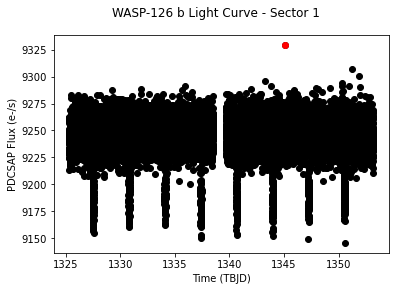

In [11]:
# Start figure and axis.
fig, ax = plt.subplots()

# Plot the timeseries in black circles.
ax.plot(tess_bjds, pdcsap_fluxes, "ko")

# Locate quality flags greater than zero.
where_gt0 = np.where(qual_flags > 0)[0]

# Overplot the fluxes with quality flags greater than zero in red.
ax.plot(tess_bjds[where_gt0], pdcsap_fluxes[where_gt0], 'ro')

# Let's label the axes and define a title for the figure.
fig.suptitle("WASP-126 b Light Curve - Sector 1")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")
plt.show()

In [12]:
with fits.open(fits_file, mode="readonly") as hdulist:
    aperture = hdulist[2].data

In [13]:
fits.getdata(fits_file, ext=2)

array([[257, 261, 261, 257, 257, 257, 257, 257, 257, 257, 257],
       [257, 261, 261, 257, 257, 257, 261, 261, 261, 261, 257],
       [257, 261, 261, 257, 257, 257, 257, 261, 261, 261, 257],
       [257, 261, 257, 257, 267, 267, 257, 257, 257, 261, 257],
       [257, 257, 257, 257, 267, 267, 267, 257, 257, 257, 257],
       [257, 261, 257, 257, 267, 267, 267, 257, 257, 257, 257],
       [257, 261, 257, 257, 257, 267, 257, 257, 257, 261, 257],
       [257, 261, 257, 257, 257, 257, 257, 257, 261, 261, 257],
       [257, 261, 261, 257, 257, 257, 257, 257, 261, 261, 257],
       [257, 257, 261, 261, 257, 257, 261, 261, 261, 257, 257],
       [257, 257, 257, 257, 257, 257, 257, 257, 257, 257, 257]],
      dtype=int32)

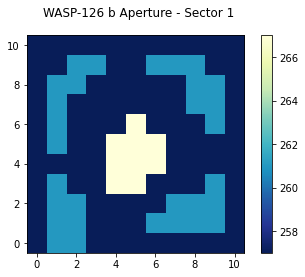

In [14]:
# Start figure and axis.
fig, ax = plt.subplots()

# Display the pixels as an image.
cax = ax.imshow(aperture, cmap=plt.cm.YlGnBu_r, origin="lower")

# Add a color bar.
cbar = fig.colorbar(cax)

# Add a title to the plot.
fig.suptitle("WASP-126 b Aperture - Sector 1")
plt.show()

In [15]:
def read_tesskplr_file(path, normalized = True, typeinst='tess', strgtype='PDCSAP_FLUX', boolmaskqual=True, boolmasknann=True):
    
    '''
    Reads a TESS or Kepler light curve file and returns a data cube with time, flux and flux error
    '''
    
    listhdun = fits.open(path)
    time = listhdun[1].data['TIME'] + 2457000
    if typeinst == 'TESS':
        time += 2457000
    if typeinst == 'kplr':
        time += 2454833
    
    flux = listhdun[1].data[strgtype]
    if strgtype == 'PDCSAP_FLUX':
        stdv = listhdun[1].data['PDCSAP_FLUX_ERR']
    else:
        stdv = flux * 0.
    
    tsec = listhdun[0].header['SECTOR']
    tcam = listhdun[0].header['CAMERA']
    tccd = listhdun[0].header['CCD']
        
    indxtimequalgood = np.where(listhdun[1].data['QUALITY'] == 0)[0]
    if boolmaskqual:
        # filtering for good quality
        time = time[indxtimequalgood]
        flux = flux[indxtimequalgood]
        stdv = stdv[indxtimequalgood]
    
    numbtime = time.size
    arry = np.empty((numbtime, 3))
    arry[:, 0] = time
    arry[:, 1] = flux
    arry[:, 2] = stdv
    
    indxtimenanngood = np.where(~np.any(np.isnan(arry), axis=1))[0]
    if boolmasknann:
        arry = arry[indxtimenanngood, :]
    
    #print('HACKING, SKIPPING NORMALIZATION FOR SPOC DATA')
    # normalize
    if normalized:
        arry[:, 2] /= np.median(arry[:, 1])
        arry[:, 1] /= np.median(arry[:, 1])
    
    return arry, indxtimequalgood, indxtimenanngood, tsec, tcam, tccd

In [61]:
ts1 = read_tesskplr_file('/Users/romfradkin/Desktop/Astrophysics/Sector1LC.nosync/tess2018206045859-s0001-0000000025155310-0120-s_lc.fits', normalized = False)
ts2 = read_tesskplr_file('/Users/romfradkin/Desktop/Astrophysics/Sector1LC.nosync/tess2018206045859-s0001-0000000025155310-0120-s_lc.fits')

In [62]:
aArray = np.array(ts1[0])
bArray = np.array(ts2[0])

In [63]:
dfUnnormal = pd.DataFrame(aArray, columns = ["Time","Flux","Flux Error"])
dfNormal = pd.DataFrame(bArray, columns = ["Time","Flux","Flux Error"])

In [64]:
dfNormal, dfUnnormal

(               Time      Flux  Flux Error
 0      2.458325e+06  0.998521    0.001332
 1      2.458325e+06  0.999686    0.001333
 2      2.458325e+06  1.001544    0.001334
 3      2.458325e+06  0.998002    0.001333
 4      2.458325e+06  0.999409    0.001334
 ...             ...       ...         ...
 18098  2.458353e+06  1.001680    0.001336
 18099  2.458353e+06  0.999137    0.001335
 18100  2.458353e+06  0.997615    0.001334
 18101  2.458353e+06  0.999306    0.001335
 18102  2.458353e+06  0.999389    0.001335
 
 [18103 rows x 3 columns],
                Time         Flux  Flux Error
 0      2.458325e+06  9233.582031   12.314050
 1      2.458325e+06  9244.356445   12.328287
 2      2.458325e+06  9261.540039   12.339831
 3      2.458325e+06  9228.784180   12.322871
 4      2.458325e+06  9241.797852   12.332719
 ...             ...          ...         ...
 18098  2.458353e+06  9262.791992   12.358855
 18099  2.458353e+06  9239.282227   12.340900
 18100  2.458353e+06  9225.201172   12.33

<AxesSubplot:xlabel='Time', ylabel='Flux'>

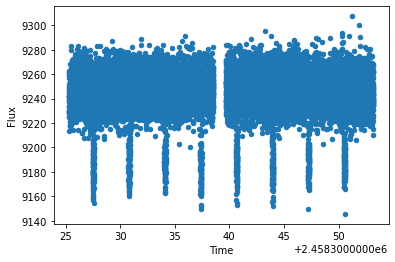

In [65]:
dfUnnormal.plot.scatter("Time","Flux")

<AxesSubplot:xlabel='Time', ylabel='Flux'>

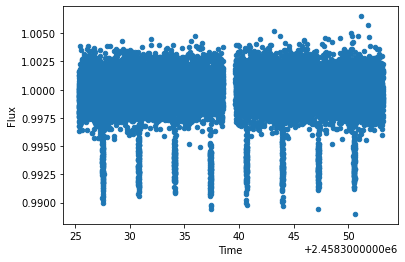

In [66]:
dfNormal.plot.scatter("Time", "Flux")

## Astroquery
https://astroquery.readthedocs.io/en/latest/mast/mast.html

In [22]:
obs_table = Observations.query_region("322.49324 12.16683")
print(obs_table[:10])

intentType obs_collection provenance_name ... srcDen  obsid  distance
---------- -------------- --------------- ... ------ ------- --------
   science          SWIFT              -- ... 5885.0 1455548      0.0
   science          SWIFT              -- ... 5885.0 1455549      0.0
   science          SWIFT              -- ... 5885.0 1514187      0.0
   science          SWIFT              -- ... 5885.0 1455550      0.0
   science          SWIFT              -- ... 5885.0 1515379      0.0
   science          SWIFT              -- ... 5885.0 1515380      0.0
   science          SWIFT              -- ... 5885.0 1453534      0.0
   science          SWIFT              -- ... 5885.0 1478168      0.0
   science          SWIFT              -- ... 5885.0 1502897      0.0
   science          SWIFT              -- ... 5885.0 1502898      0.0


In [23]:
obs_table = Observations.query_object("M8",radius=".02 deg")
print(obs_table[:10])

intentType obs_collection provenance_name ... srcDen  obsid  distance
---------- -------------- --------------- ... ------ ------- --------
   science    SPITZER_SHA    SSC Pipeline ...    nan 1647157      0.0
   science    SPITZER_SHA    SSC Pipeline ...    nan 1647157      0.0
   science    SPITZER_SHA    SSC Pipeline ...    nan 1647157      0.0
   science    SPITZER_SHA    SSC Pipeline ...    nan 1647157      0.0
   science    SPITZER_SHA    SSC Pipeline ...    nan 1647157      0.0
   science    SPITZER_SHA    SSC Pipeline ...    nan 1647157      0.0
   science    SPITZER_SHA    SSC Pipeline ...    nan 1647157      0.0
   science    SPITZER_SHA    SSC Pipeline ...    nan 1647157      0.0
   science    SPITZER_SHA    SSC Pipeline ...    nan 1647157      0.0
   science    SPITZER_SHA    SSC Pipeline ...    nan 1647157      0.0


## Lightkurve

In [24]:
search_result = lk.search_lightcurve('Wasp-126 b', quarter = 0)
search_result[1]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,25155310,0.0


In [25]:
lc = search_result[1].download()
lc

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1325.2966486684504,9.2335820e+03,1.2314050e+01,8.9759467e-04,70445,1623.85163,393.35081,8.0255674e+03,1.0421468e+01,7.6212451e+02,2.3448346e+00,9.2335820e+03,1.2314050e+01,0,nan,nan,nan,nan,1623.85163,8.0720574e-04,393.35081,9.4080920e-04,2.8770527e-02,-7.3971689e-02
1325.2980375681282,9.2443564e+03,1.2328287e+01,8.9760596e-04,70446,1623.82576,393.32255,8.0493604e+03,1.0433517e+01,7.6140833e+02,2.3451660e+00,9.2443564e+03,1.2328287e+01,0,nan,nan,nan,nan,1623.82576,8.0956618e-04,393.32255,9.3708758e-04,-2.4086139e-03,-1.0912614e-01
1325.2994264677468,9.2615400e+03,1.2339831e+01,8.9761720e-04,70447,1623.82580,393.31920,8.0634863e+03,1.0443287e+01,7.6246497e+02,2.3458278e+00,9.2615400e+03,1.2339831e+01,0,nan,nan,nan,nan,1623.82580,8.0896920e-04,393.31920,9.3583745e-04,-3.0620014e-03,-1.1284415e-01
1325.3008153673668,9.2287842e+03,1.2322871e+01,8.9762843e-04,70448,1623.82392,393.31074,8.0352324e+03,1.0428933e+01,7.6435455e+02,2.3488533e+00,9.2287842e+03,1.2322871e+01,0,nan,nan,nan,nan,1623.82392,8.1079575e-04,393.31074,9.3880109e-04,-4.9278643e-03,-1.2361693e-01
1325.3022042670445,9.2417979e+03,1.2332719e+01,8.9763972e-04,70449,1623.81623,393.30948,8.0502725e+03,1.0437266e+01,7.6821545e+02,2.3512347e+00,9.2417979e+03,1.2332719e+01,0,nan,nan,nan,nan,1623.81623,8.1186224e-04,393.30948,9.3674322e-04,-1.1961141e-02,-1.2371579e-01
1325.3035931667214,9.2328135e+03,1.2330336e+01,8.9765101e-04,70450,1623.81742,393.30958,8.0417310e+03,1.0435251e+01,7.6987195e+02,2.3515704e+00,9.2328135e+03,1.2330336e+01,0,nan,nan,nan,nan,1623.81742,8.1317622e-04,393.30958,9.3659555e-04,-1.3031098e-02,-1.2403972e-01
1325.3049820663414,9.2326689e+03,1.2329928e+01,8.9766225e-04,70451,1623.81950,393.30626,8.0396279e+03,1.0434906e+01,7.7136469e+02,2.3547435e+00,9.2326689e+03,1.2329928e+01,0,nan,nan,nan,nan,1623.81950,8.1195607e-04,393.30626,9.3836966e-04,-8.8721784e-03,-1.2792237e-01
1325.3063709660191,9.2372578e+03,1.2333000e+01,8.9767354e-04,70452,1623.82038,393.31121,8.0447759e+03,1.0437505e+01,7.6988190e+02,2.3525679e+00,9.2372578e+03,1.2333000e+01,0,nan,nan,nan,nan,1623.82038,8.1192469e-04,393.31121,9.3837525e-04,-1.0403624e-02,-1.2400141e-01


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

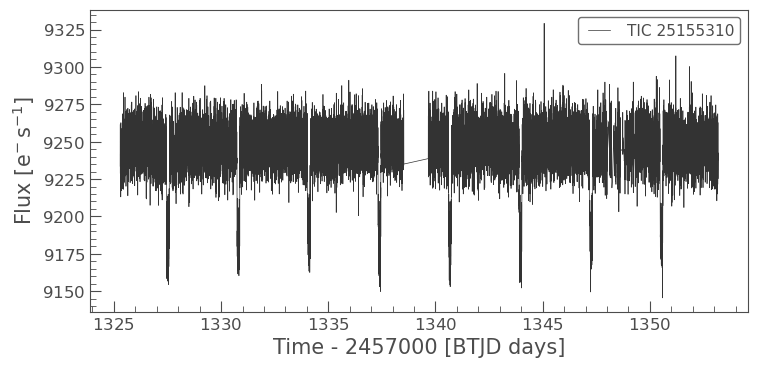

In [26]:
lc.plot()

In [27]:
search_result = lk.search_targetpixelfile('Wasp-126 b', quarter = 0)
search_result[1]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,TESS-SPOC,1800,25155310,0.0


In [28]:
tpf = search_result.download()

/Users/romfradkin/miniconda3/envs/Astrophysics/lib/python3.9/site-packages/lightkurve/search.py:346: LightkurveWarning: Warning: 39 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


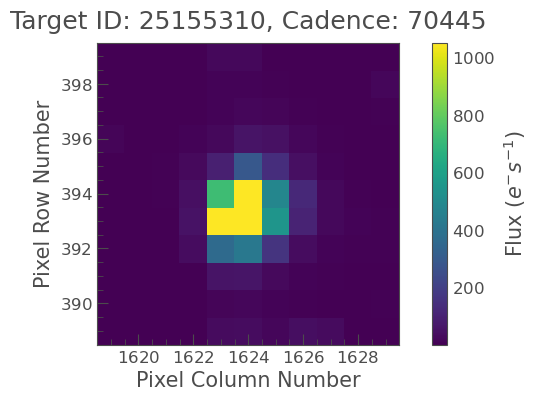

In [29]:
tpf.plot();

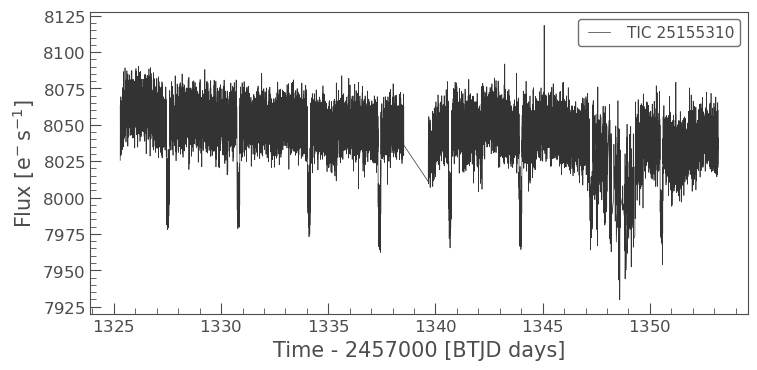

In [30]:
lc = tpf.to_lightcurve()
lc.plot();

## Scheduling (ET)